# Informacje wstępne

Autorem mini-projektu jest **Krzysztof Niedziejko**.  Jego numer indeksu to **117 859**. Przedmiotem pracy jest luźna analiza szeregu czasowego wysokości kursu kontraktów Futures na pszenicę notowaną na francuskiej giełdzie MATIF. Ogólny kod tego papieru wartościowego to **BL2c1**.

Dane śróddzienne są kosztowne w uzyskaniu, dlatego też na potrzeby przygotowania poniższej analizy posłużono się danymi dziennymi - [kliknij, aby samodzielnie pozyskać arkusz .csv](https://www.investing.com/commodities/milling-wheat-n2-historical-data).

Badanie podzielono na:
* przygotowanie danych,
* wykresy na rzecz wizualizacji zauważonych własności,
* wnioski.


In [226]:
!pwd

#starting directory


/content


In [227]:
import os
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from tabulate import tabulate
import seaborn as sns
import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objects as go

!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
!pip install --upgrade mplfinance
import mplfinance as fplt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/matplotlib/mpl_finance/archive/master.zip
  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [228]:

# download TA-Lib 
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!ls
!tar xvzf ta-lib-0.4.0-src.tar.gz
!ls
os.chdir('ta-lib') # Can't use !cd in co-lab
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install TA-Lib
!pip install yfinance
import yfinance as yf


--2023-02-04 09:15:25--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-02-04 09:15:25--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-02-04 09:15:25--  http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving gigenet.dl.sour

In [229]:
from io import IncrementalNewlineDecoder
import yfinance as yf
import talib as ta
# from google.colab import drive
# drive.mount('/content/drive', force_remount= True)

# root_dir="/content/drive/MyDrive/"
# INWD= "Colab Notebooks/INWD/"

# def set_working_directory(INWD):
#   if os.path.isdir(root_dir + INWD) == False:
#     os.mkdir(root_dir + INWD)
#     print(root_dir + os.X_OK + 'did not existed and was created.')
  
#   os.chdir(root_dir + INWD) #setting working directory

# set_working_directory(INWD)


In [230]:

url_zboza = 'https://github.com/enkrz/ue/raw/main/inwd/zboza.csv'
zboza = pd.read_csv(url_zboza)
zboza.head(10)


,Date,Price,Open,High,Low,Vol.,Change %
0,11/07/2022,336.00,337.25,340.25,335.25,26.29K,-0.96%
1,11/04/2022,339.25,340.25,343.25,337.50,18.51K,-0.44%
2,11/03/2022,340.75,338.50,341.75,337.25,28.85K,-0.15%
3,11/02/2022,341.25,357.25,357.75,338.75,53.53K,-4.61%
4,11/01/2022,357.75,349.75,359.75,349.25,22.54K,1.56%
5,10/31/2022,352.25,351.75,353.25,344.50,43.43K,4.37%
6,10/28/2022,337.50,334.75,338.25,334.50,18.83K,0.30%
7,10/27/2022,336.50,336.50,340.00,335.75,20.48K,0.67%
8,10/26/2022,334.25,337.00,337.50,333.25,25.27K,-0.67%
9,10/25/2022,336.50,337.25,339.75,335.25,21.61K,-0.74%


In [231]:

zboza.columns= 'Data', 'Cena zamknięcia [USD]', 'Cena otwarcia [USD]', 'Maks w ciągu dnia [w USD]', 'Min w ciągu dnia [w USD]', 'Wolumen', 'Zmiana ceny [w %]'
print(type(zboza.Data[0]))

#zboza.sort_values(by='Data', ascending = True, inplace=False)


<class 'str'>


In [232]:

zboza['Data']=pd.to_datetime(zboza['Data'])
print(type(zboza.Data[0]))

zboza.sort_values(by='Data', ascending = True, inplace=True)
print(zboza.iloc[-10:,0:5].to_markdown(index=False, tablefmt="grid"))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
+---------------------+-------------------------+-----------------------+-----------------------------+----------------------------+
| Data                |   Cena zamknięcia [USD] |   Cena otwarcia [USD] |   Maks w ciągu dnia [w USD] |   Min w ciągu dnia [w USD] |
+=====================+=========================+=======================+=============================+============================+
| 2022-10-25 00:00:00 |                  336.5  |                337.25 |                      339.75 |                     335.25 |
+---------------------+-------------------------+-----------------------+-----------------------------+----------------------------+
| 2022-10-26 00:00:00 |                  334.25 |                337    |                      337.5  |                     333.25 |
+---------------------+-------------------------+-----------------------+-----------------------------+----------------------------+
| 2022-10-27 00:00

In [233]:

print(zboza.dtypes)
zboza['RoR']=zboza['Cena zamknięcia [USD]'].pct_change()
zboza['Log-RoR']=np.log(zboza['Cena zamknięcia [USD]']/zboza['Cena zamknięcia [USD]'].shift(1))
zboza.drop('Zmiana ceny [w %]', axis=1, inplace=True)
zboza.head()


Data                         datetime64[ns]
Cena zamknięcia [USD]               float64
Cena otwarcia [USD]                 float64
Maks w ciągu dnia [w USD]           float64
Min w ciągu dnia [w USD]            float64
Wolumen                              object
Zmiana ceny [w %]                    object
dtype: object


,Data,Cena zamknięcia [USD],Cena otwarcia [USD],Maks w ciągu dnia [w USD],Min w ciągu dnia [w USD],Wolumen,RoR,Log-RoR
1386,2017-06-12,168.25,169.25,169.25,168.00,9.29K,NaN,NaN
1385,2017-06-13,169.75,169.00,170.00,168.75,10.43K,0.008915,0.008876
1384,2017-06-14,169.75,170.50,171.75,169.25,12.35K,0.000000,0.000000
1383,2017-06-15,170.50,169.75,170.50,169.00,11.95K,0.004418,0.004409
1382,2017-06-16,173.50,171.25,173.75,171.25,27.78K,0.017595,0.017442


# Wykresy
Po wstępnym przygotowaniu danych możemy przejść do analizy i wizualizacji.

In [234]:

fig = go.Figure(data=[go.Candlestick(x=zboza['Data'],
                open=zboza['Cena otwarcia [USD]'],
                high=zboza['Maks w ciągu dnia [w USD]'],
                low=zboza['Min w ciągu dnia [w USD]'],
                close=zboza['Cena zamknięcia [USD]'])])


fig.update_layout(
    title='Kurs notowań kontraktów Futures na pszenicę w latach 2017-2022',
    yaxis_title='Milling Wheat N2 Futures - BL2c1',
    xaxis_rangeslider_visible=False
    #annotations=["x": date(2022,2,24), "y": zboza.query('Data'=={(2022,2,24)})['Cena zamknięcia [USD]'].squeeze(), "text":'Początek rosyjskiej agresji', "arrowhead":5)]
)

fig.update_xaxes(
    dtick="M3",
    tickformat="%b\n%Y",
    ticklabelmode="period",
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward")
        ])
    )
)

#fig.update_xaxes(minor=dict(ticks="inside", showgrid=True))

fig.show()


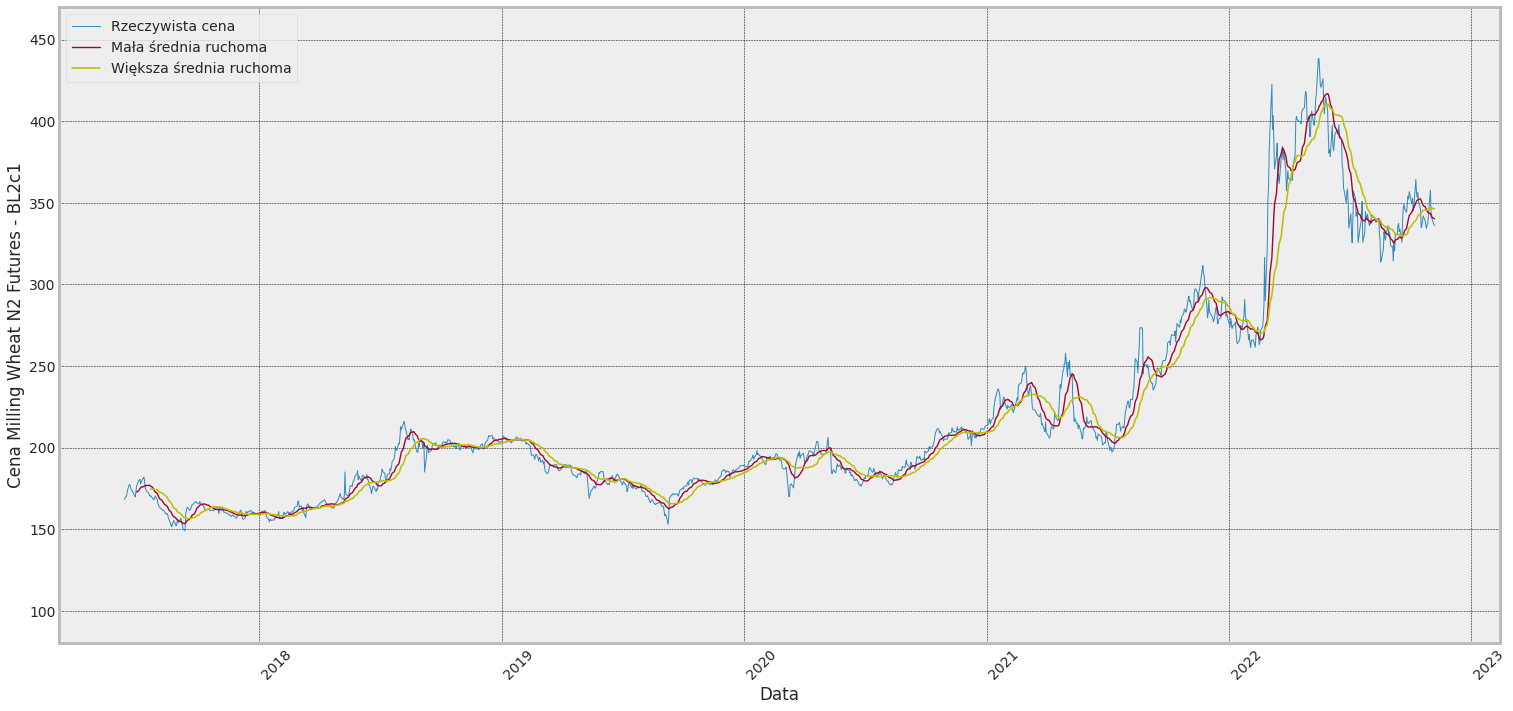

In [240]:

fig=plt.figure(figsize=(23,13))
plt.style.use('bmh')
zboza['MA 15-dniowa'] = ta.SMA(zboza['Cena zamknięcia [USD]'], timeperiod=15)
zboza['MA 30-dniowa'] = ta.SMA(zboza['Cena zamknięcia [USD]'], timeperiod=30)

plt.plot(zboza['Data'], zboza['Cena zamknięcia [USD]'], label='Rzeczywista cena', lineWidth=1)
plt.plot(zboza['Data'], zboza['MA 15-dniowa'], label='Mała średnia ruchoma', lineWidth=1.4)
plt.plot(zboza['Data'], zboza['MA 30-dniowa'],c="y", label='Większa średnia ruchoma', lineWidth=1.6)

plt.xlabel('Data')
plt.ylabel('Cena Milling Wheat N2 Futures - BL2c1')
plt.ylim(80,470)
plt.title=('Notowania kontraktów Futures na pszenicę w latach 2017-2022')
plt.legend()

plt.grid(which='major', color='black')

plt.gcf().autofmt_xdate(bottom=0.2,rotation=45, ha='left')

plt.show()


In [241]:

zboza['RSI'] = ta.RSI(zboza['Cena zamknięcia [USD]'], 14)

fig = go.Figure(go.Scatter(x=zboza['Data'],
                y=zboza['RSI'],
                marker=dict(
            color='LightSkyBlue',
            size=20,
            line=dict(
                color='MediumPurple',
                width=30
            )
        ),))

fig.update_yaxes(range=[-10, 110])
fig.add_hline(y=0, line_color="#666", line_width=2)
fig.add_hline(y=100, line_color="#666", line_width=2)

fig.add_hline(y=30, line_color='#336699', line_width=2, line_dash='dash')
fig.add_hline(y=70, line_color='#336699', line_width=2, line_dash='dash')

fig.update_layout(
    title='Relative Strength Index - Futures na pszenicę (2017-2022)',
    yaxis_title='Milling Wheat N2 Futures - BL2c1',
    plot_bgcolor='#e6dff4',
    font_family='Courier New, monospace',
    xaxis_rangeslider_visible=True
)

fig.show()


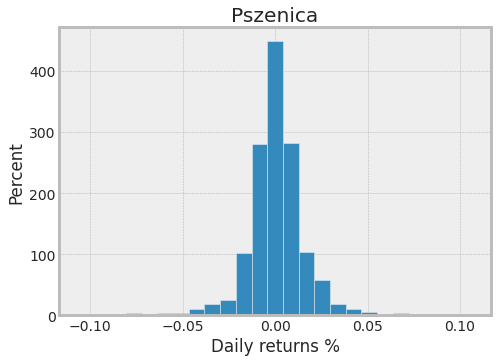

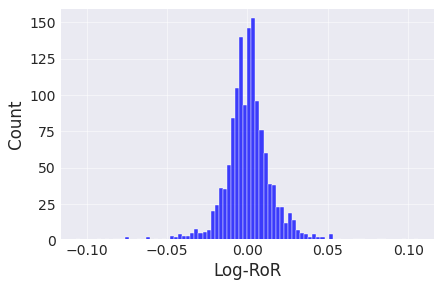

In [242]:

fig=plt.figure()

ax1 = fig.add_axes([0.2,0.2,1.0,1.0])
zboza['Log-RoR'].plot.hist(bins = 25)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Pszenica")
plt.show()


zboza.describe()

sns.set_style('darkgrid')
sns.histplot(zboza['Log-RoR'])

# plt.hist2d(x=zboza['Data'], y=zboza['RoR'])
# plt.xlabel('Data')
# plt.ylabel('RoR')

# plt.show()

In [244]:

zboza2=zboza.copy()

zboza2=zboza2.set_index(pd.DatetimeIndex(zboza2['Data'].values))
zboza2.drop(['Cena zamknięcia [USD]'], inplace=True, axis=1)
zboza2.drop(['Cena otwarcia [USD]'], inplace=True, axis=1)
zboza2.drop(['Maks w ciągu dnia [w USD]'], inplace=True, axis=1)
zboza2.drop(['Min w ciągu dnia [w USD]'], inplace=True, axis=1)
zboza2.drop(['Wolumen'], inplace=True, axis=1)
zboza2.drop(['RoR'], inplace=True, axis=1)
zboza2.drop(['MA 15-dniowa'], inplace=True, axis=1)
zboza2.drop(['MA 30-dniowa'], inplace=True, axis=1)
zboza2.drop(['RSI'], inplace=True, axis=1)
zboza2['Miesiąc']=zboza1['Data'].dt.month
zboza2.groupby(['Miesiąc']).mean()

fig=px.bar(zboza2, y='Log-RoR', x='Miesiąc', color="Log-RoR", color_continuous_scale=px.colors.sequential.Agsunset)
fig.show()

In [ ]:
#miesieczne stopy

zboza1=zboza.copy()

zboza1=zboza1.set_index(pd.DatetimeIndex(zboza1['Data'].values))
zboza1.drop(['Cena zamknięcia [USD]'], inplace=True, axis=1)
zboza1.drop(['Cena otwarcia [USD]'], inplace=True, axis=1)
zboza1.drop(['Maks w ciągu dnia [w USD]'], inplace=True, axis=1)
zboza1.drop(['Min w ciągu dnia [w USD]'], inplace=True, axis=1)
zboza1.drop(['Wolumen'], inplace=True, axis=1)
zboza1.drop(['RoR'], inplace=True, axis=1)
zboza1['Rok']=zboza1['Data'].dt.year
zboza1['Miesiąc']=zboza1['Data'].dt.month

zboza1['Miesiąc'].replace(1,'Styczeń', inplace=True)
zboza1['Miesiąc'].replace(2,'Luty', inplace=True)
zboza1['Miesiąc'].replace(3,'Marzec', inplace=True)
zboza1['Miesiąc'].replace(4,'Kwiecień', inplace=True)
zboza1['Miesiąc'].replace(5,'Maj', inplace=True)
zboza1['Miesiąc'].replace(6,'Czerwiec', inplace=True)
zboza1['Miesiąc'].replace(7,'Lipiec', inplace=True)
zboza1['Miesiąc'].replace(8,'Sierpień', inplace=True)
zboza1['Miesiąc'].replace(9,'Wrzesień', inplace=True)
zboza1['Miesiąc'].replace(10,'Październik', inplace=True)
zboza1['Miesiąc'].replace(11,'Listopad', inplace=True)
zboza1['Miesiąc'].replace(12,'Grudzień', inplace=True)

# pszenica=zboza1.groupby(["Miesiąc", "Rok"])['Log-RoR'].reset_index()
# #pszenica.drop(['Data'], inplace=True, axis=1)
pszenica[['Log-RoR']].resample('M').ffill()
#pszenica.head()
#fig = px.bar(pszenica, x='Miesiąc', y='Log-RoR', color='LifeExp')
#fig.show()
# pszenica.head()
# pszenica=pszenica.pivot('Rok','Miesiąc', 'Log-RoR')
# pszenica.sort_index(inplace=True)

#pivot=pszenica.pivot_table('Rok','Miesiąc', 'Log-RoR')

# fig, ax = plt.subplots(figsize=(10,5))
# plt.title('bla')
# sns.heatmap(pszenica, annot=True,  fmt="", ax=ax) #index, columns, values
# # plt.show()


Log-RoR
Miesiąc  Rok                      
Czerwiec 2017 2017-06-30  0.018585
         2018 2018-06-30  0.025533
         2019 2019-06-30 -0.011035
         2020 2020-06-30  0.006949
         2021 2021-06-30  0.031556
...                            ...
Wrzesień 2018 2018-09-30  0.003729
         2019 2019-09-30  0.004301
         2020 2020-09-30  0.028207
         2021 2021-09-30  0.007782
         2022 2022-09-30  0.012694

[66 rows x 1 columns]

#Wnioski

Po kolejnej agresji Rosji na Ukrainę w ubiegłym roku notowania analizowanych kursów poszybowały w górę - przyczyną było duże znaczenie Ukrainy, będącej bezpośrednią ofiarą wojny, jako światowego eksportera zboża. Co prawda histogram nie potwierdził ryzyka gromadzenia się wysokiej zmienności, ale **co innego mówią wykresy dotyczące podstawowej analizy technicznej** (m. in. wartości wskaźnika RSI, który wskazywał w analizowanym okresie co najmniej kilka okazji do wyprzedaży bądź okazyjnych zakupów). Zmienność niewątpliwie jeszcze przez długi czas będzie utrzymywać się na niestandardowo wysokim poziomie, rynek jednak powoli zaczyna otrząsać się z wojennego marazmu - analiza ostatnich miesięcy może inteligentym inwestorom pozwolić na wyciągnięcie wniosków i zastosowanie bardziej skutecznych strategii niż dotychczas - zwłaszcza, że konflikt na Ukrainie nie chyli się ku końcowi.